In [1]:
import numpy as np
import matplotlib.pyplot as plt
import h5py

f = h5py.File('longtime_hbar_stat_N100.hdf5', 'r')

In [2]:
f.keys()

<KeysViewHDF5 ['h0bars', 'times', 'vbars', 'ws']>

In [41]:
omegas = f['ws'][:]
av_h0 = [np.average(f['h0bars'][i,:]) for i, w in enumerate(omegas)]
av_v = [np.average(f['vbars'][i,:]) for i, w in enumerate(omegas)]

sd_h0 = [np.std(f['h0bars'][i,:]) for i, w in enumerate(omegas)]
sd_v = [np.std(f['vbars'][i,:]) for i, w in enumerate(omegas)]

idx = [0, 5, 10,35, 50,  -1]
time_series_h0 = f['h0bars'][idx]
time_series_v = f['vbars'][idx]

ws = omegas[idx]

<IPython.core.display.Javascript object>


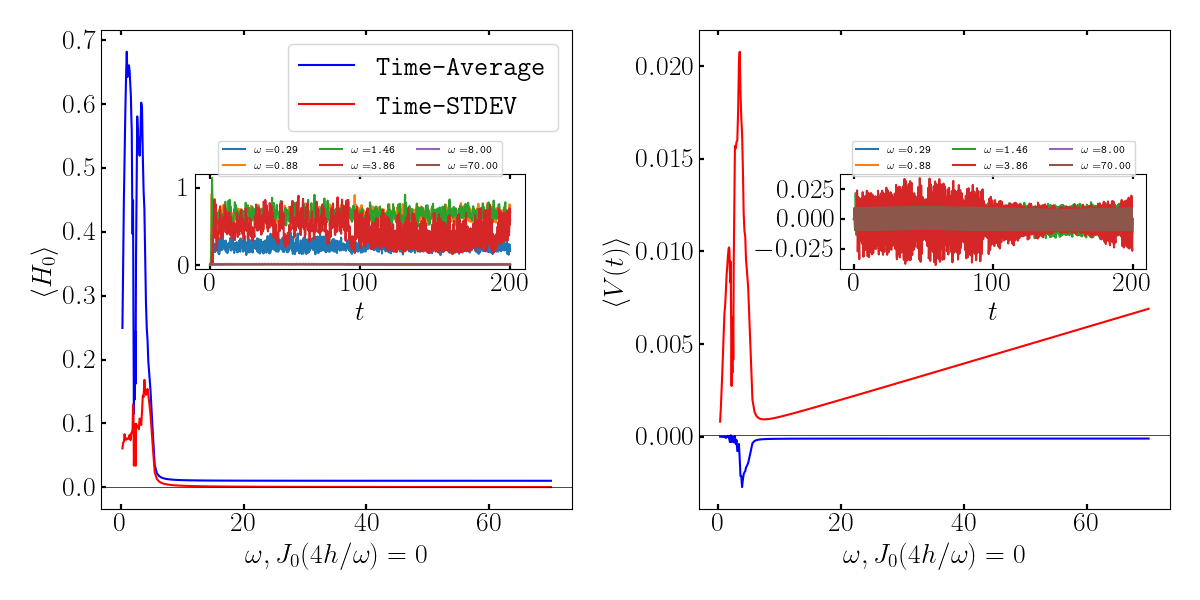

In [59]:
import matplotlib


fig, (ax0, ax1) = plt.subplots(1,2,figsize=(12,6))

xlabel = r'$\omega, J_0(4h/\omega)=0$'

avgs = ax0.plot(omegas, av_h0,'b', label="Time-Average")
ax0.plot(omegas, sd_h0,'r', label="Time-STDEV")
ax0.set_xlabel(xlabel)
ax0.set_ylabel(r'$\langle H_0\rangle$')
ax0.axhline(y=-0.0001, color='black', linewidth=0.5)

inset0=ax0.inset_axes([0.2, 0.5, 0.7, 0.2])

for i,data in enumerate(time_series_h0):
    inset0.plot(np.array(times), data.flatten(), label=fr"$\omega = ${ws[i]:1.2f}")
    
inset0.set_xlabel(r'$t$')
inset0.legend(bbox_to_anchor=(0.5, 1.4), loc='upper center', ncol=3, fontsize=8)


ax0.legend()

ax1.plot(omegas, av_v,'b', label="Time-Average")
ax1.plot(omegas, sd_v,'r', label="Time-STDEV")
ax1.set_xlabel(xlabel)
ax1.set_ylabel(r'$\langle V(t)\rangle$')
ax1.axhline(y=0.0001, color='black', linewidth=0.5)
inset1=ax1.inset_axes([0.3, 0.5, 0.65, 0.2])

for i,data in enumerate(time_series_v):
    inset1.plot(np.array(times), data.flatten(), label=fr"$\omega = ${ws[i]:1.2f}")
    
inset1.set_xlabel(r'$t$')
inset1.legend(bbox_to_anchor=(0.5, 1.4), loc='upper center', ncol=3, fontsize=8)


fig.tight_layout()
plt.savefig("averages.png", dpi=600)
plt.show()

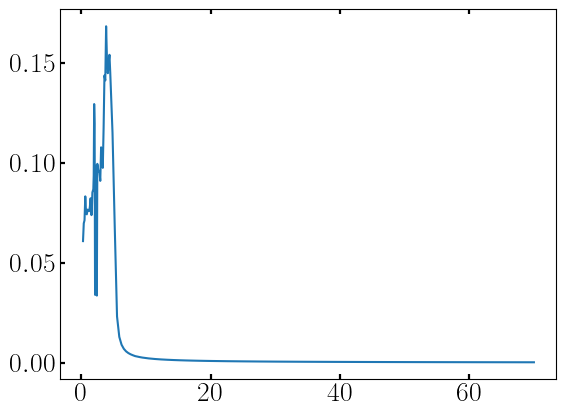

In [20]:
sd_h = [np.std(f['h0bars'][i,:]) for i, w in enumerate(f['ws'][:])]
plt.plot(f['ws'][:], sd_h)
plt.show()